In [1]:
# All imports for the project goes here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from helpers import feature_plot, oneHotEnc_to_classes, parse_datetime_features_to_hours, RocCallback
from helpers import datetime_feature_engineering, fill_datetime_with_neighbors, save_model, load_model
from helpers import fire_number_feature_engineering, data_analysis_by_size_class
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import category_encoders as ce
from datetime import datetime
from sklearn.preprocessing import StandardScaler, RobustScaler
from helpers import feature_plot
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV


%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [166]:
# Loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

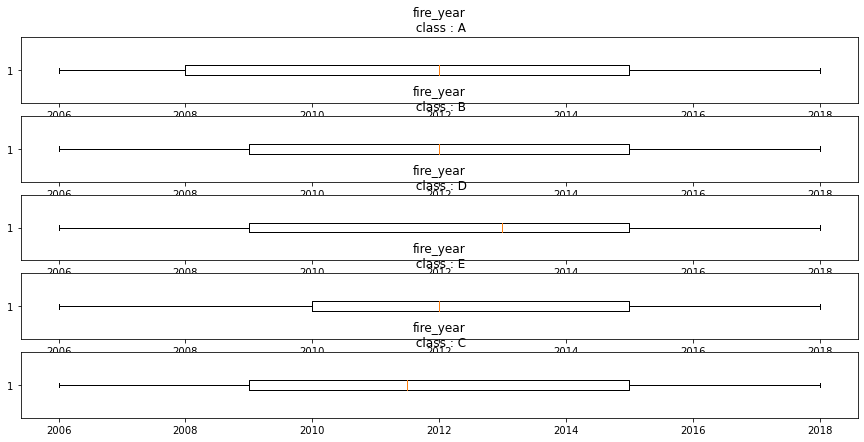

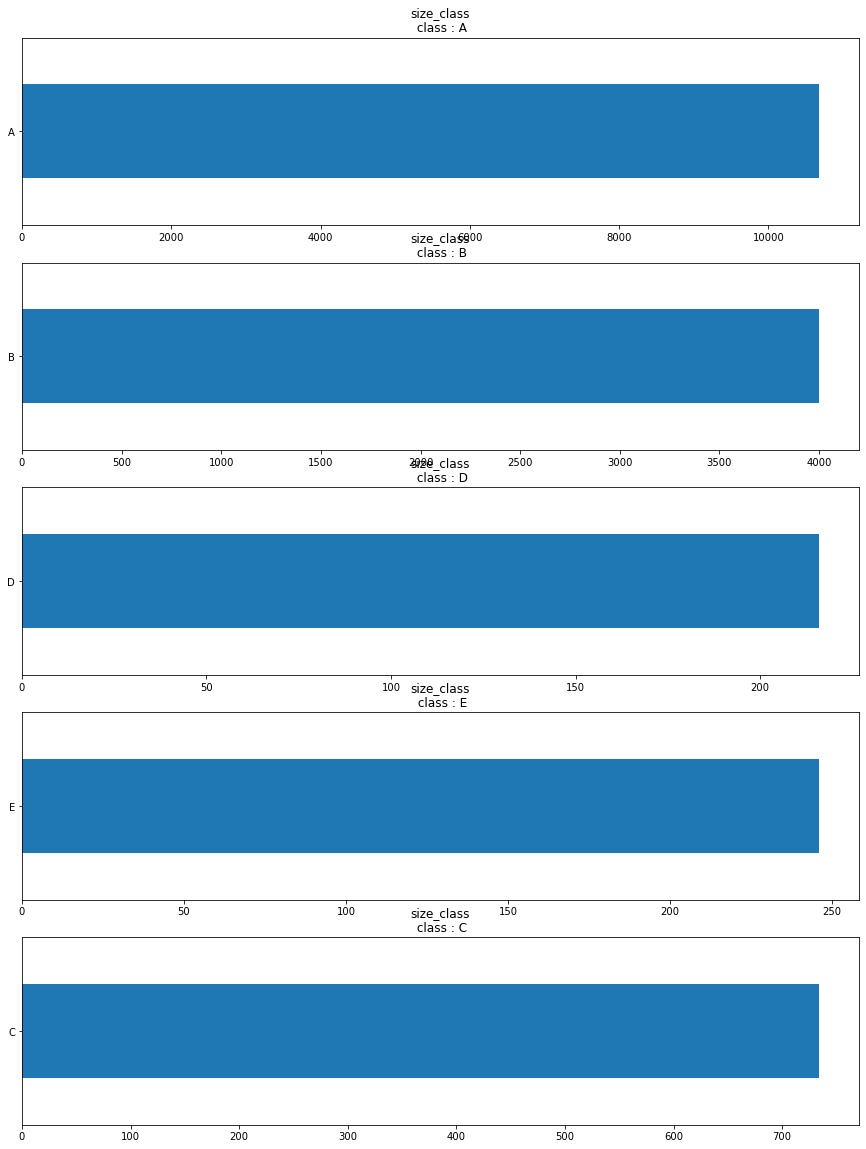

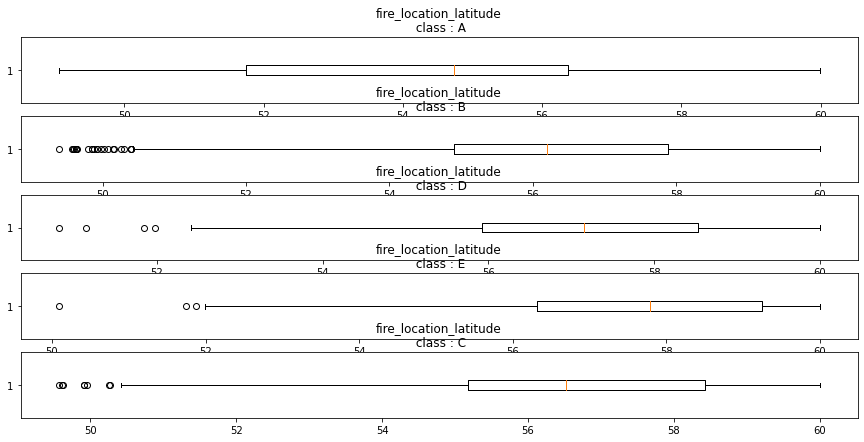

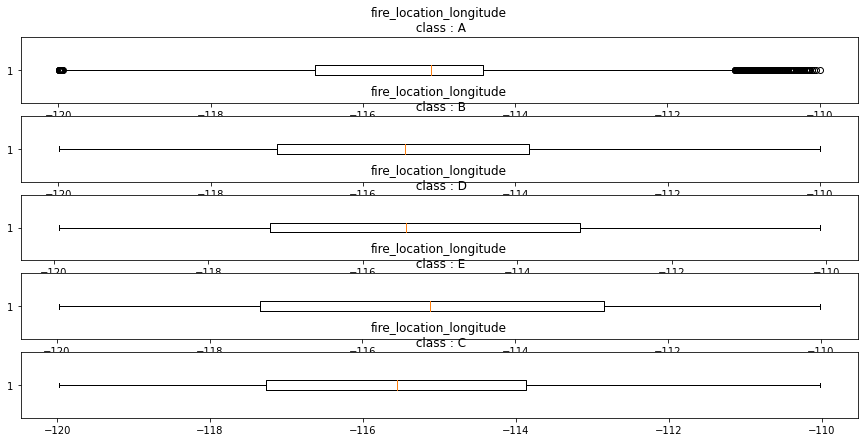

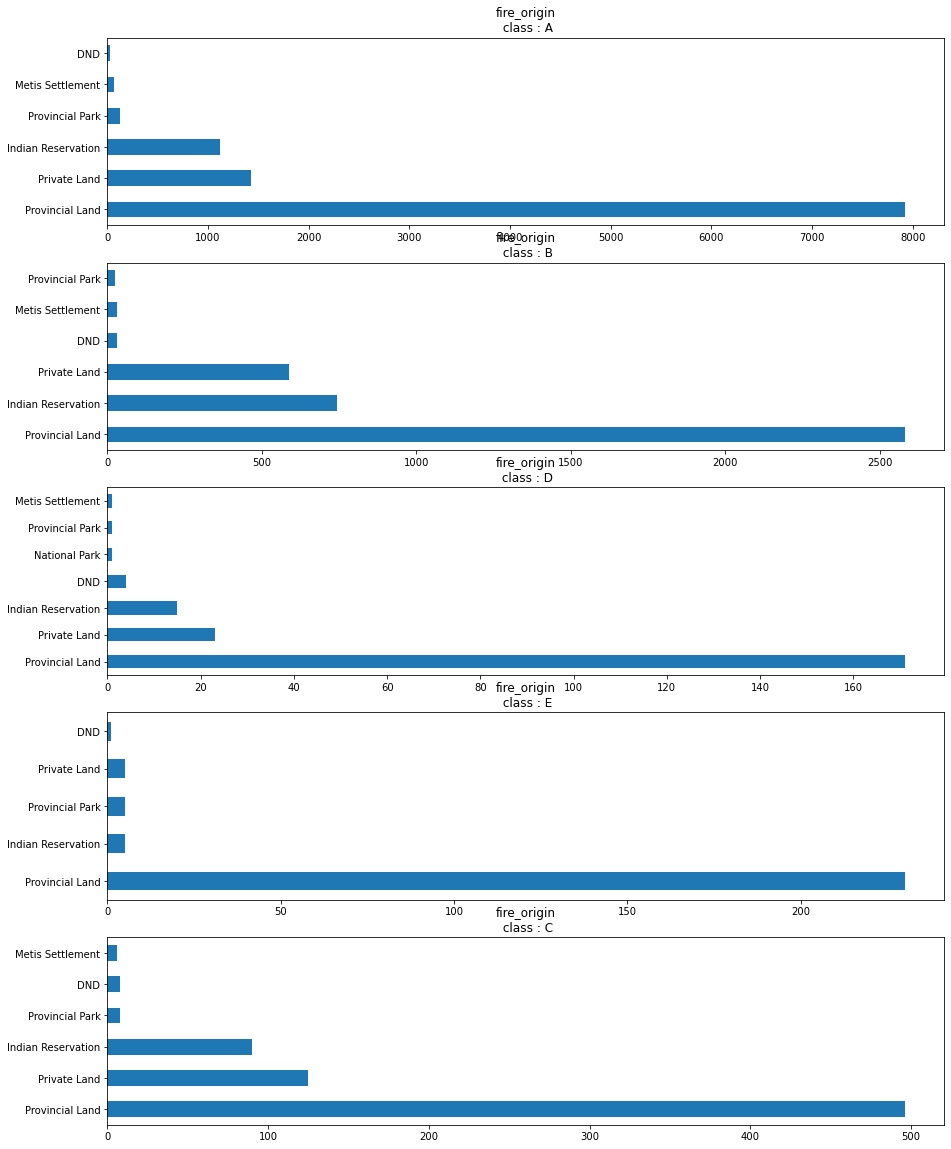

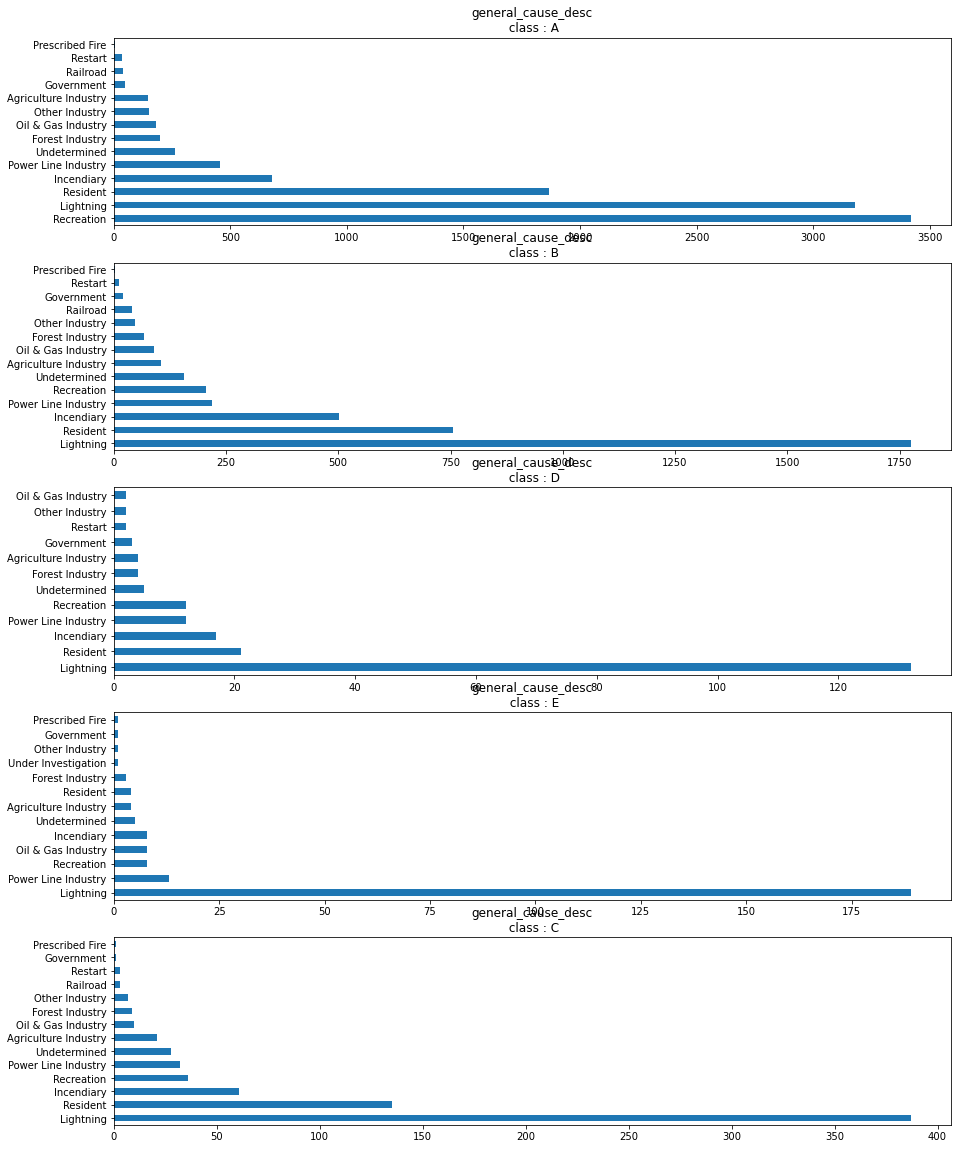

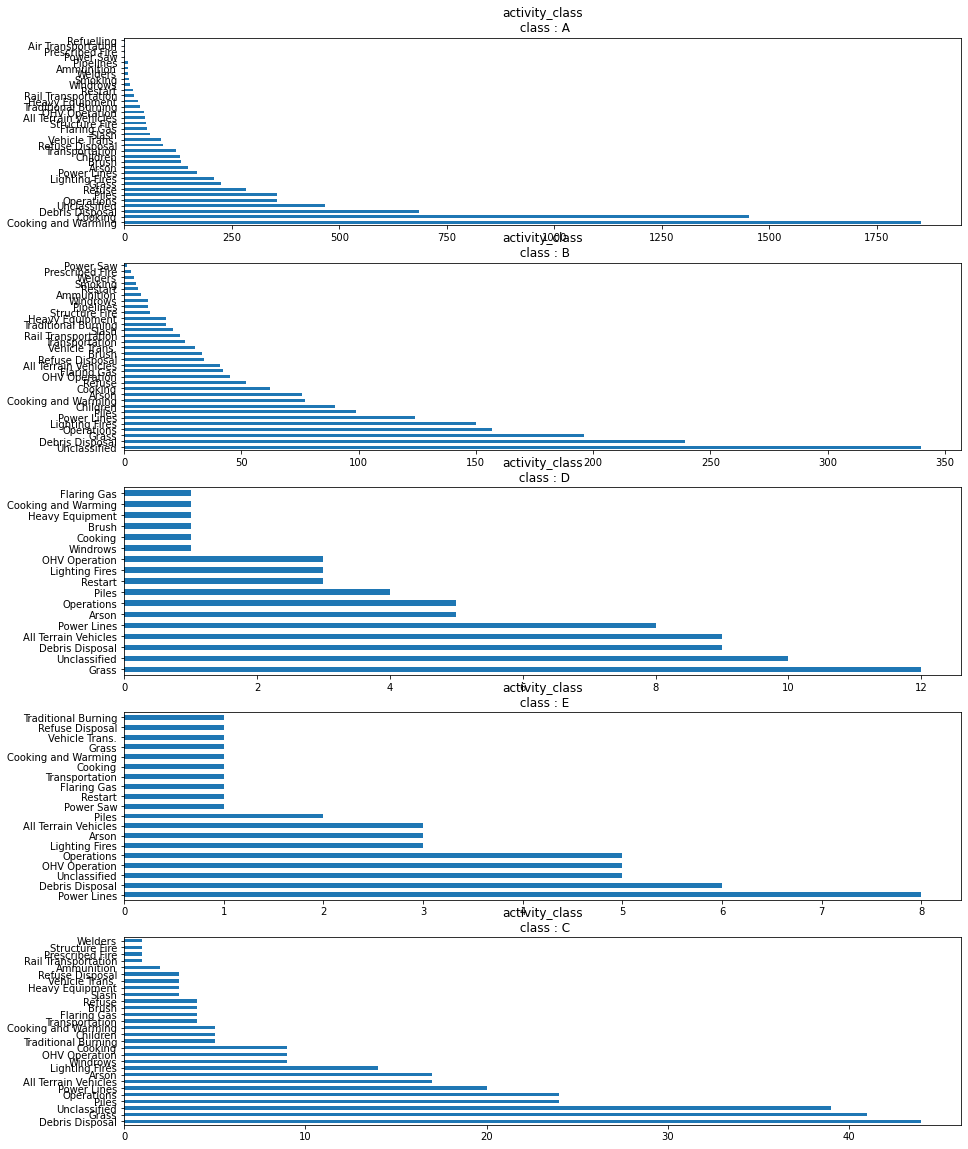

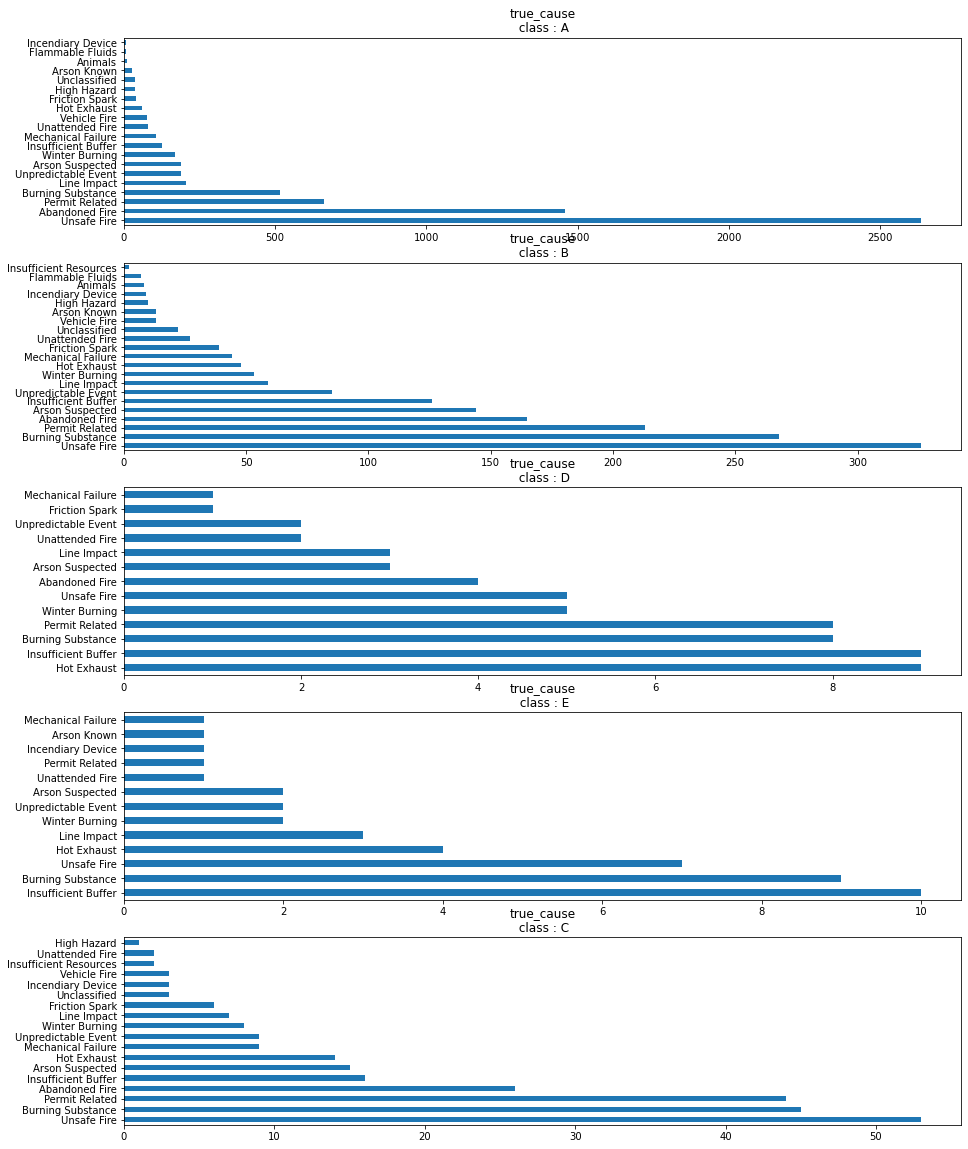

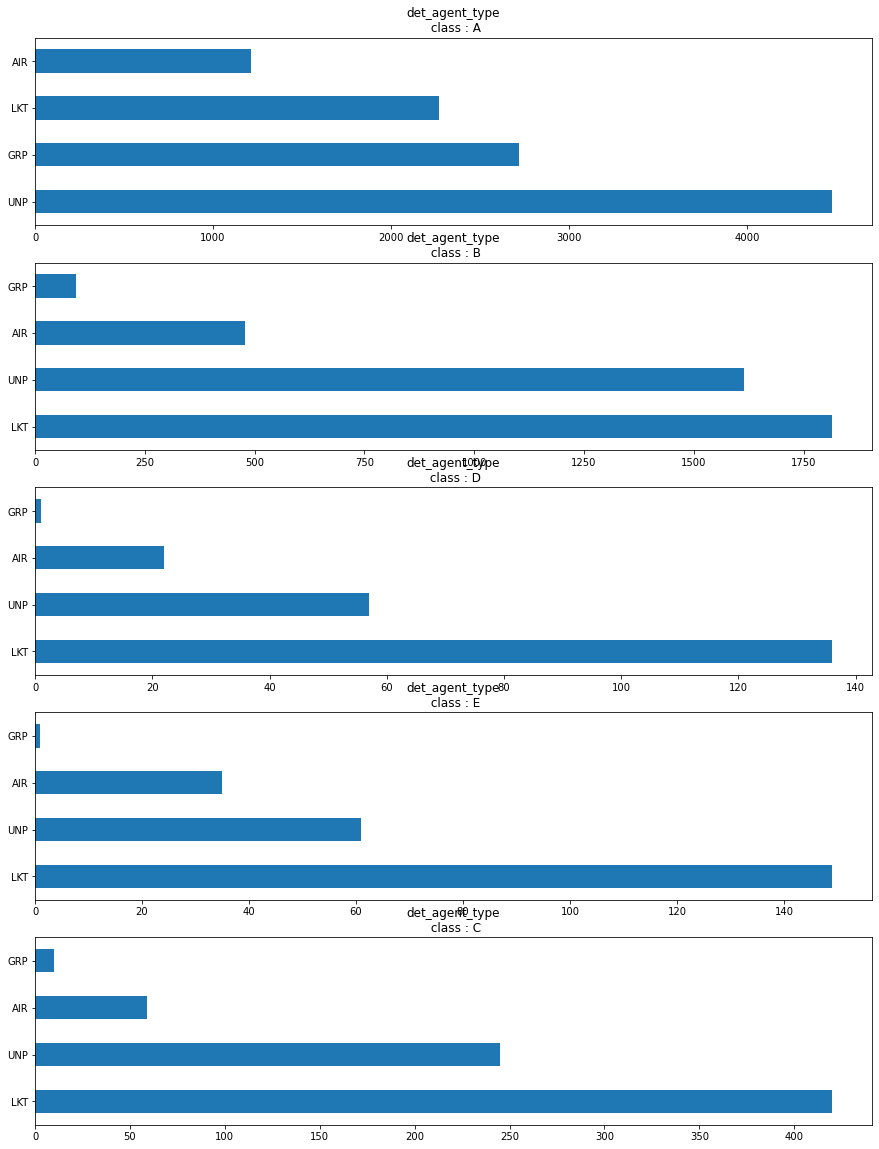

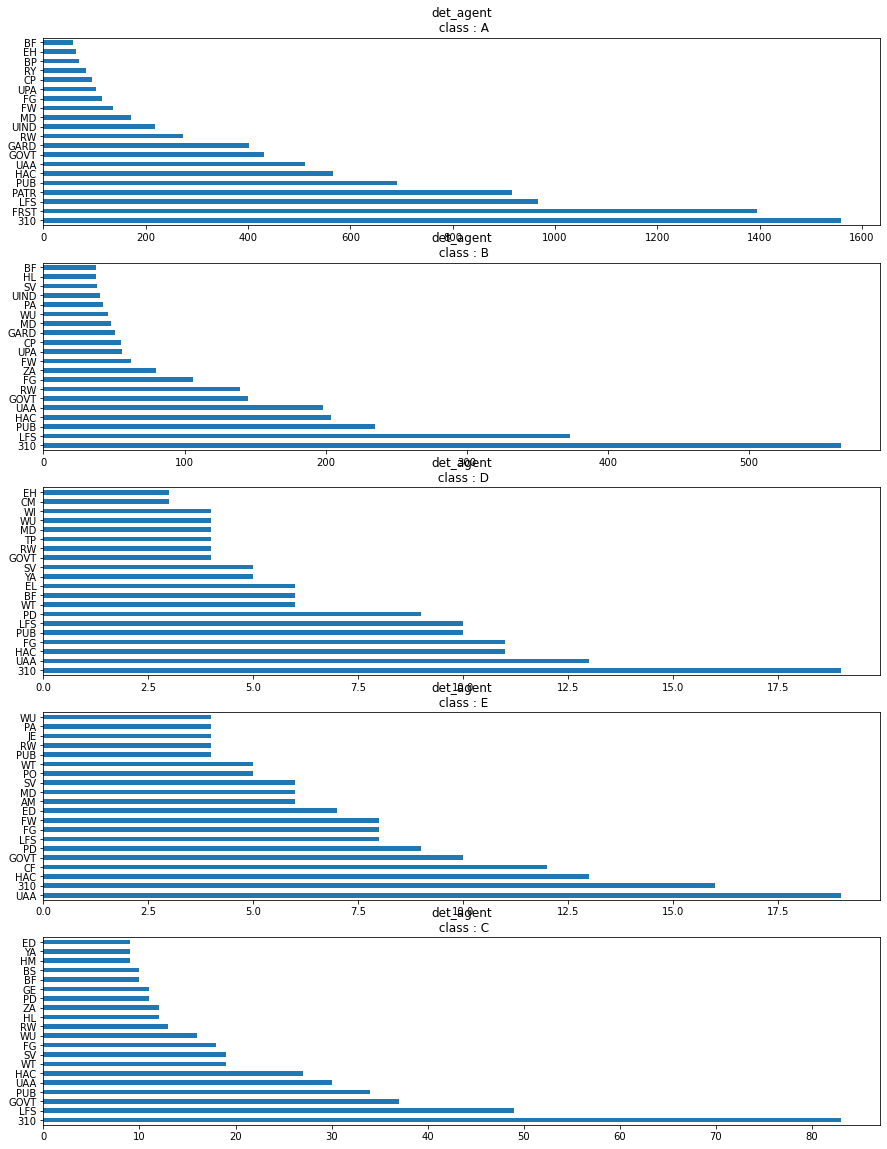

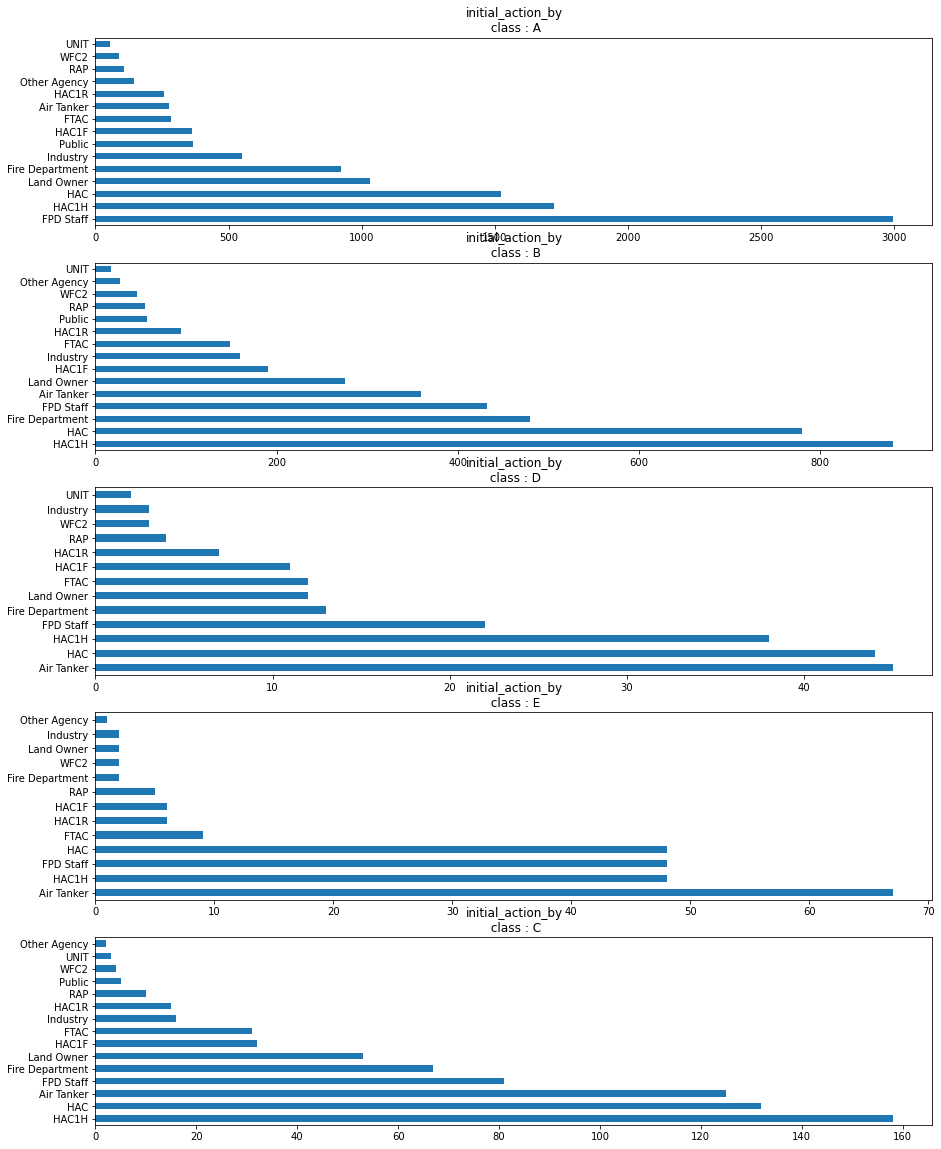

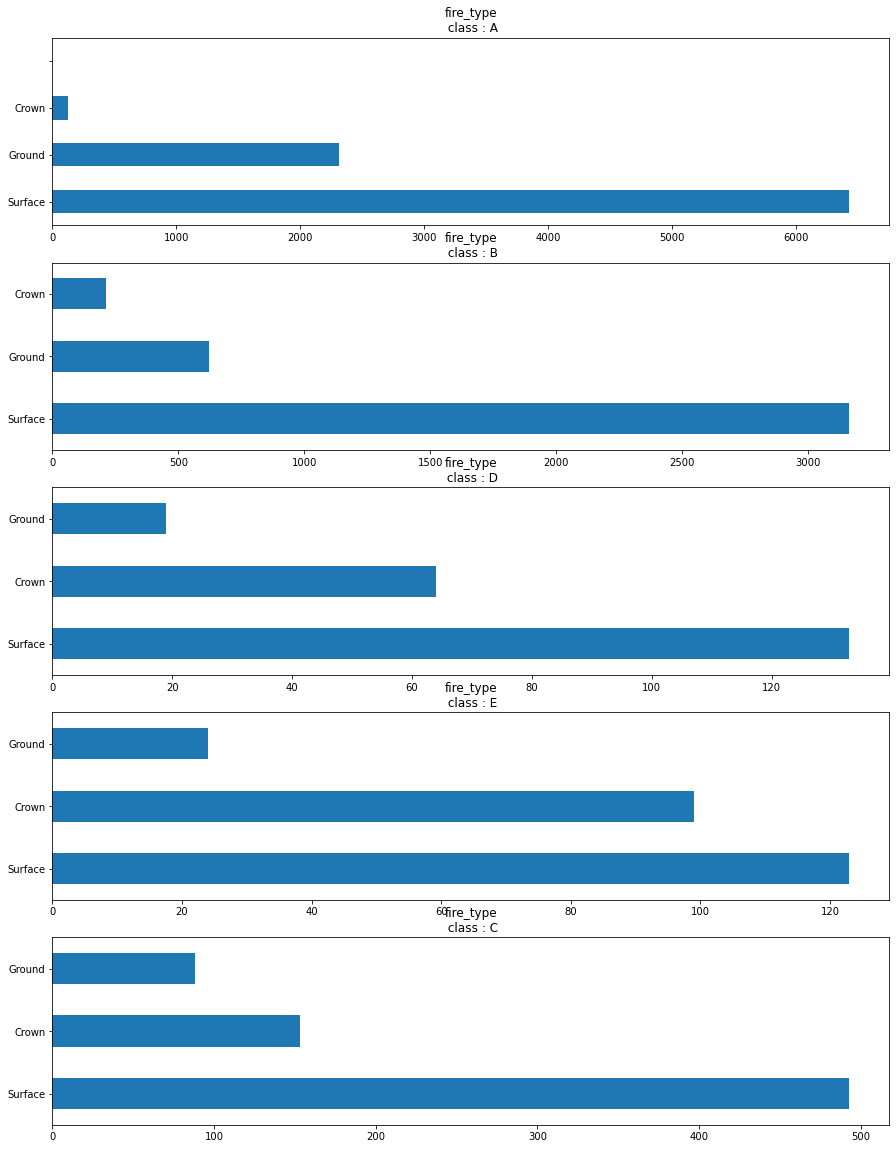

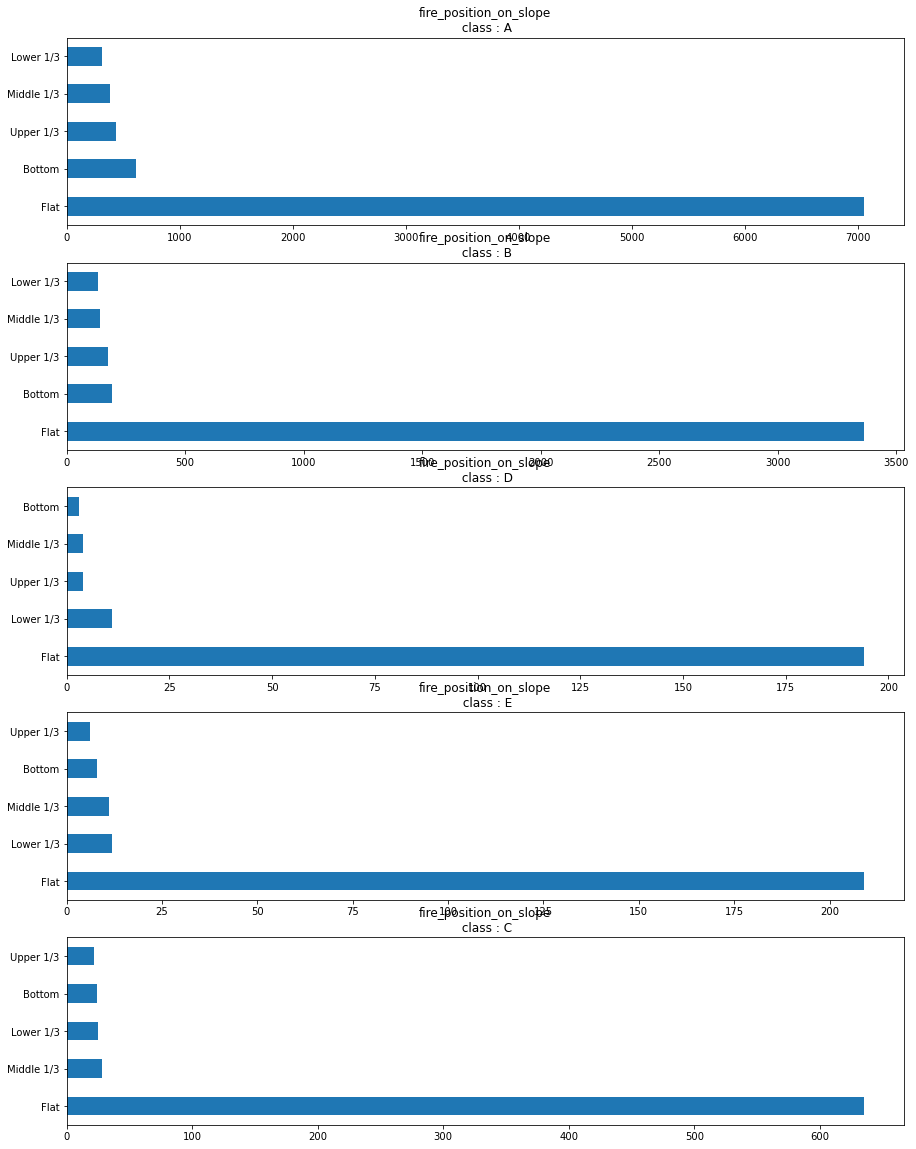

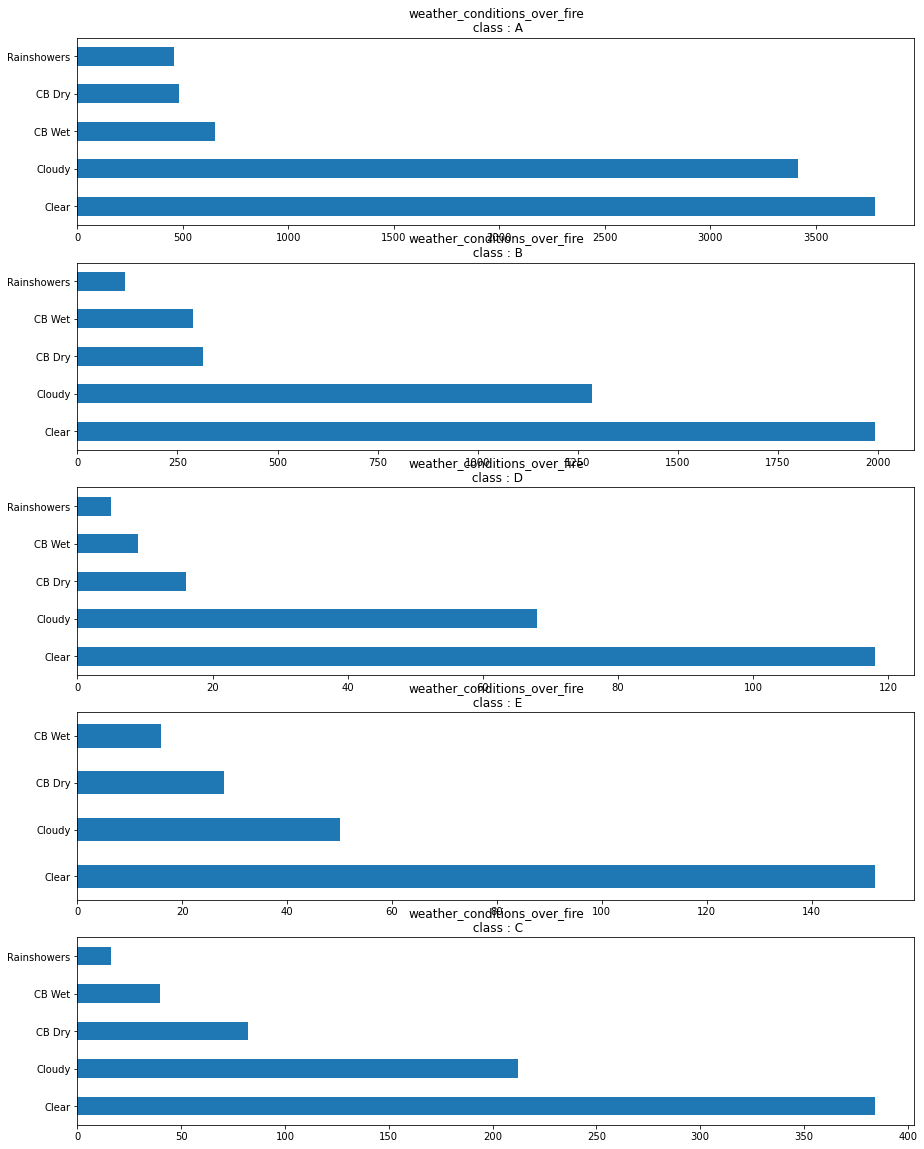

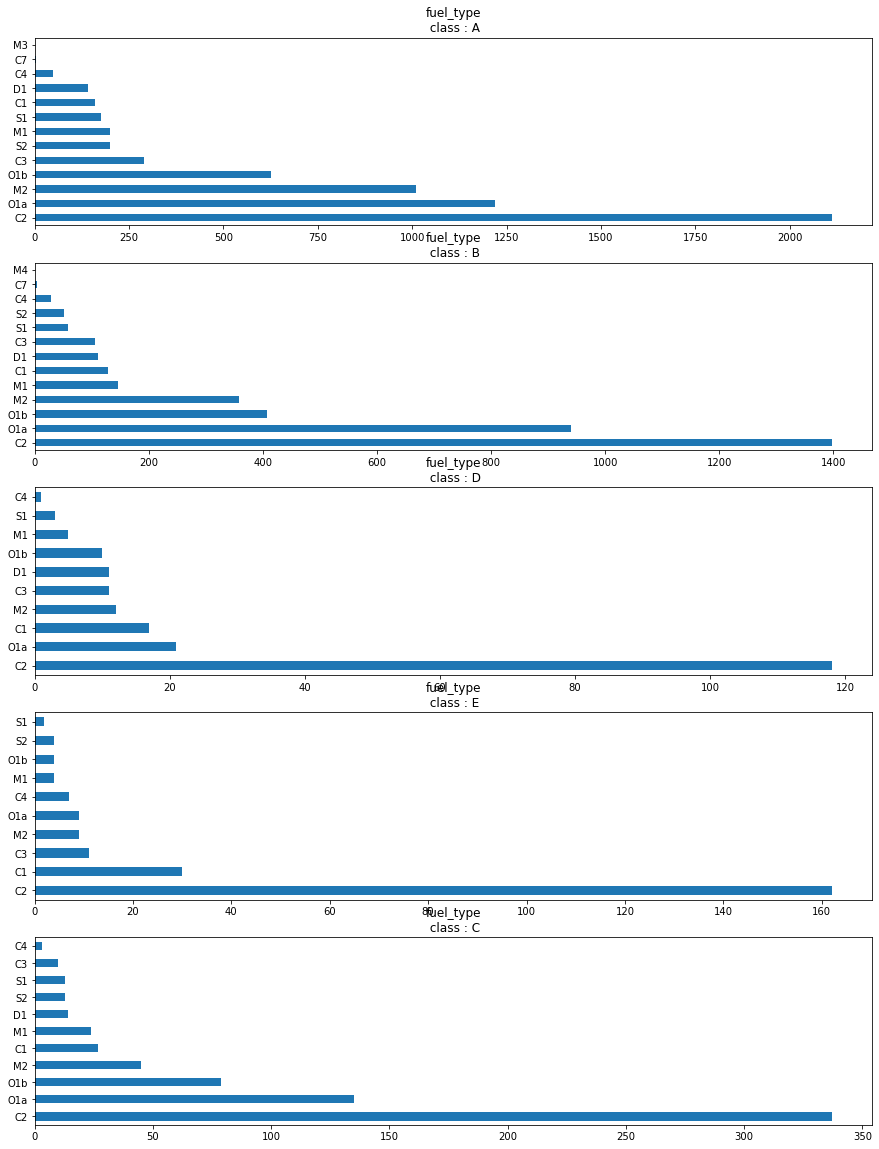

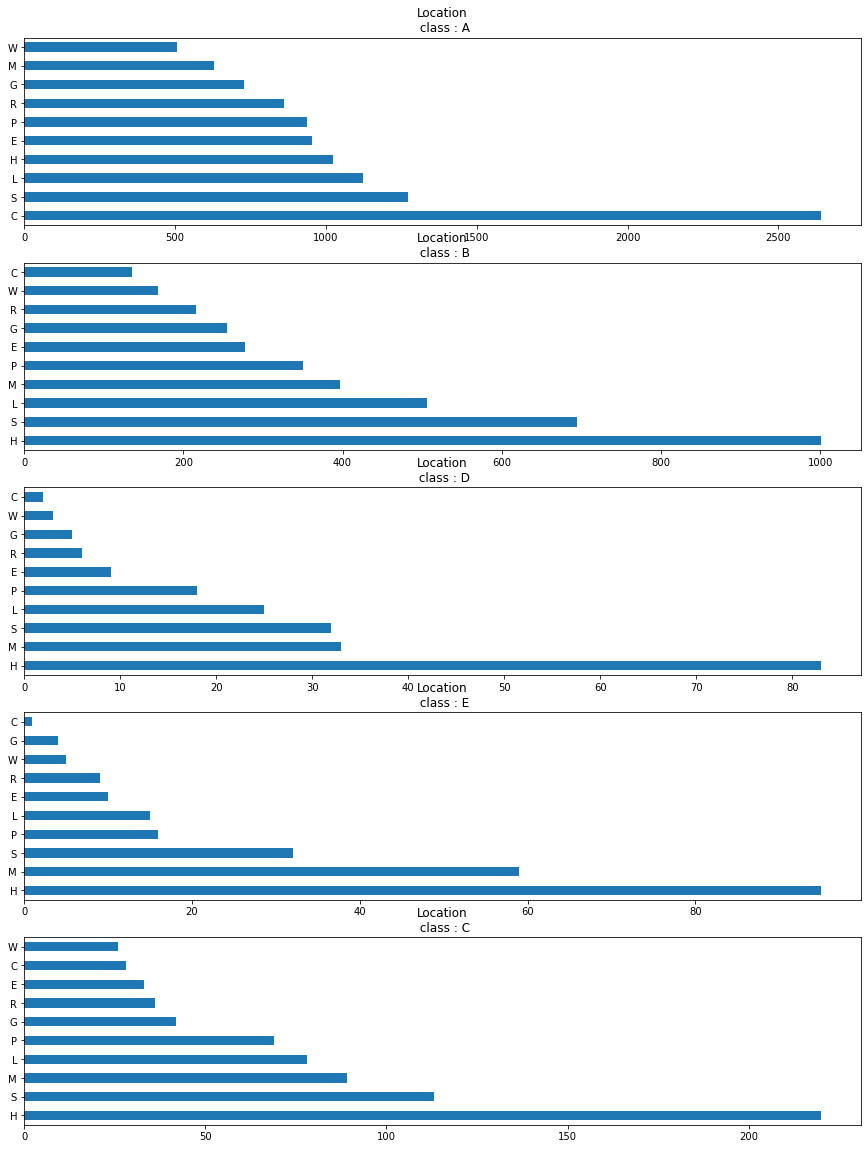

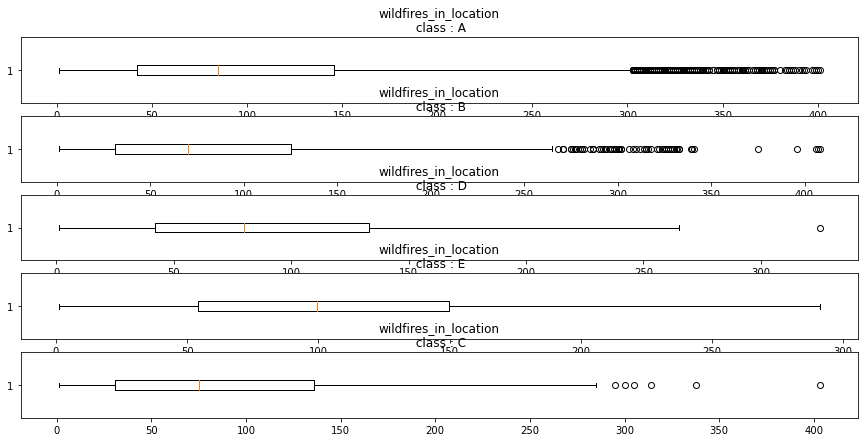

In [168]:
data_analysis_by_size_class(train);

In [324]:
# Loading the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
dates_list = ['assessment_datetime', 'fire_start_date', 'discovered_date', 'reported_date', 'start_for_fire_date', 
             'fire_fighting_start_date', 'bh_fs_date', 'uc_fs_date', 'ex_fs_date']
# parsing the object to datetime type
train[dates_list]=pd.to_datetime(train[dates_list].stack(), format = "%Y-%m-%d %H:%M:%S").unstack()
test[dates_list]=pd.to_datetime(test[dates_list].stack(), format = "%Y-%m-%d %H:%M:%S").unstack()

C:\Users\MRgarciaE\Anaconda3\envs\carino\lib\site-packages\matplotlib\cbook\__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\MRgarciaE\Anaconda3\envs\carino\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\MRgarciaE\Anaconda3\envs\carino\lib\site-packages\matplotlib\cbook\__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\MRgarciaE\Anaconda3\envs\carino\lib\site-packages\matplotlib\cbook\__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


(-10000.0, 5000.0)

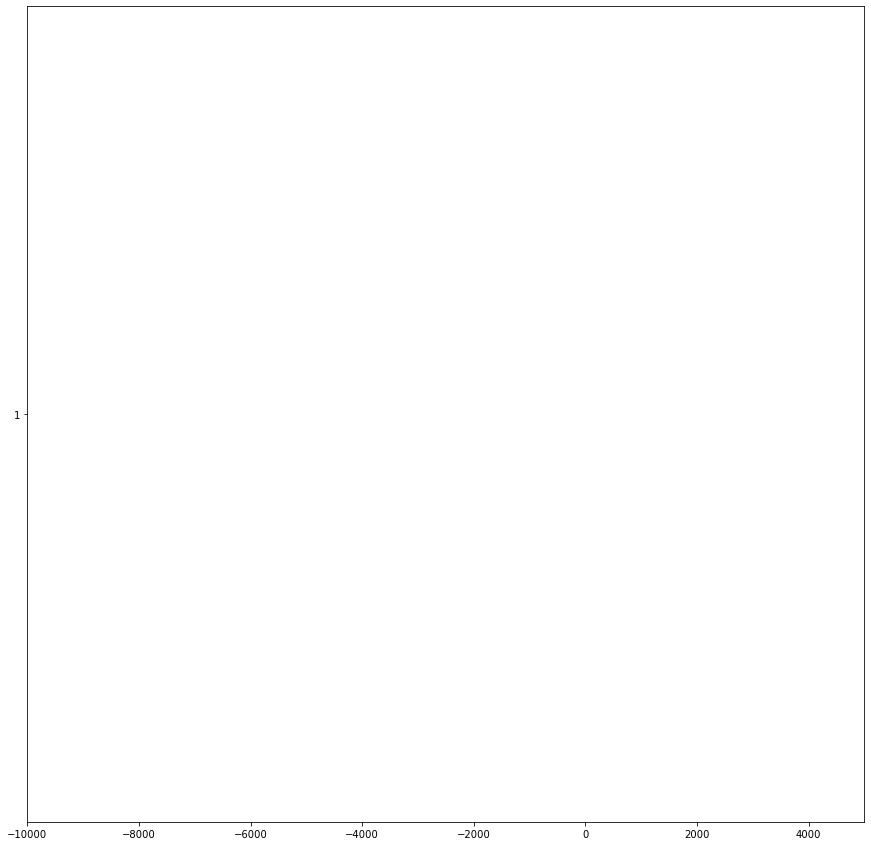

In [325]:
feature_assessed = 'fire_duration'
ind = train['size_class']=='A'
plt.figure(figsize=(15,15))
train['fire_fighting_start_date'].fillna(train.reported_date , inplace=True)
plt.boxplot((datetime_feature_engineering(train)[feature_assessed])[ind], vert=False)
plt.xlim(-10000, 5000)

(-10000.0, 5000.0)

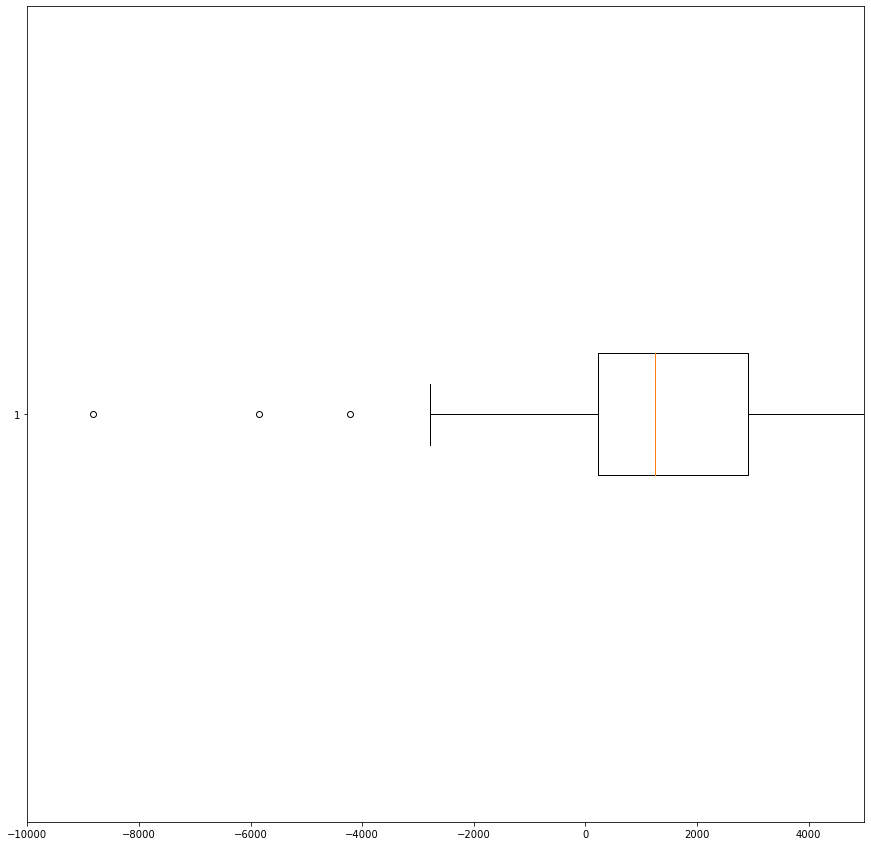

In [323]:
ind = train['size_class']=='B'
plt.figure(figsize=(15,15))
plt.boxplot((datetime_feature_engineering(train)[feature_assessed])[ind], vert=False)
plt.xlim(-10000, 5000)

In [218]:
print(f"---- null values in feature: {feature_assessed} ----")
for class_curr in train['size_class'].unique():
    ind = train['size_class']==class_curr
    null_values = np.sum((datetime_feature_engineering(train)[feature_assessed])[ind].isnull())
    print(f"train class {class_curr} null values = {null_values}/{np.sum(ind)}")

null_values = np.sum((datetime_feature_engineering(test)[feature_assessed]).isnull())
print(f"\ntest null values = {null_values}")

---- null values in feature: time_to_bh ----
train class A null values = 3014/10679
train class B null values = 1001/4000
train class D null values = 31/216
train class E null values = 10/246
train class C null values = 143/734

test null values = 1080
